<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">ANALYSE DES APPLICATIONS GOOGLE PLAY STORE</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

# Analyse des applications Google Play Store

Ce notebook présente une **analyse exploratoire et statistique** des données issues du Google Play Store.  
L’objectif est de comprendre les caractéristiques des applications, d’étudier les relations entre les variables (note, nombre d’installations, prix, etc.) et d’identifier les facteurs influençant le revenu et la popularité des applications.

Les étapes principales sont les suivantes :

1. **Importation, exploration initiale et nettoyage des données** : aperçu général du dataset, traitement des doublons, valeurs manquantes, types, formats et outliers.  
2. **Analyse univariée** : étude des distributions et des caractéristiques des variables numériques et catégorielles.  
3. **Analyse multivariée** : exploration des relations entre variables, corrélations, visualisations croisées et tests statistiques.  
4. **Analyses avancées** : étude des revenus théoriques générés, répartition par catégorie, courbe de Lorenz, indice de Gini et analyses temporelles.  
5. **Synthèse et conclusions** : principaux enseignements et recommandations issues de l’analyse.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, chargement des fichiers et configuration visuelle</h2>
</div>

In [1]:
#Importations
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import datetime as dt
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu, norm

In [2]:
#Importations csv
Data = pd.read_csv("C:/Users/AUCLAIR/Documents/Projet_Data_Pro/googleplaystore.csv", sep=',')

In [3]:
# Configuration globale du style des visualisations (cohérence et lisibilité)
sns.set_theme(style="whitegrid")

plt.rcParams.update({
    "figure.figsize": (10, 5.5),
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "DejaVu Sans",
    "axes.edgecolor": "#333333",
    "axes.spines.top": False,
    "axes.spines.right": False,
})

In [4]:
# Définition des palettes de couleurs utilisées pour les graphiques
palette_main = sns.color_palette("Set2")
palette_grad = sns.cubehelix_palette(as_cmap=True)

In [5]:
def get_extended_palette(palette_base, n_colors):
    """
    Génère une palette étendue à partir d'une palette de base
    pour un nombre exact de couleurs.
    """
    cmap = LinearSegmentedColormap.from_list("extended", palette_base, N=n_colors)
    return [cmap(i/(n_colors-1)) for i in range(n_colors)]

In [6]:
# Fonction utilitaire : ajoute la valeur au-dessus des barplots
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height:,.0f}".replace(",", " "),
                        xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 4),
                        textcoords="offset points",
                        ha="center", va="bottom",
                        fontsize=9)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

In [7]:
Data.head(4)  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [8]:
Data.shape

(10841, 13)

In [9]:
Data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
Data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
Data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
tous = Data.duplicated()
Data[tous]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Préparation et Nettoyage des Données</h2>
</div>

**Gestion des doublons**

In [13]:
#Suppression des doublons et vérifications
Data.drop_duplicates(inplace = True)
Data[Data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
#Etude des doublons pour la colonne 'App'
tous = Data.duplicated(keep=False)
Data[tous].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*Il n'y a plus de doublons dans le dataframe, je les ai supprimés.*

In [15]:
# Analyse des valeurs de la colonne 'Reviews'
Numerique = Data['Reviews'].str.fullmatch(r'\d+')
Data[~Numerique]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Je remarque un décalage sur la ligne 10472.**

**Correction du décalage**

In [16]:
# On convertit Reviews en float si ce n’est pas déjà le cas
if Data['Reviews'].dtype != 'float':
    Data['Reviews'] = pd.to_numeric(Data['Reviews'], errors='coerce')

# On prend la ligne à corriger
row = Data.loc[10472].copy()

# Décalage corrigé
values = row.values.tolist()
fixed_values = values[:1] + [np.nan] + values[1:]
fixed_values = fixed_values[:len(row)]

# On crée une Series typée object
fixed_series = pd.Series(fixed_values, index=Data.columns, dtype='object')

# Correction : convertir explicitement chaque valeur au bon type avant assignation
for col, val in fixed_series.items():
    # Si la colonne est float et que la valeur est numérique, on cast
    if Data[col].dtype == 'float' and pd.notna(val):
        try:
            Data.at[10472, col] = float(val)
        except ValueError:
            Data.at[10472, col] = np.nan
    else:
        Data.at[10472, col] = val

# Vérification
print(Data.loc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                  NaN
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object


In [17]:
# Correction du type de données de la colonne 'Reviews'
Data['Reviews'] = Data['Reviews'].astype(int)
print("Nombre de valeurs manquantes de la colonne 'Reviews' :", Data['Reviews'].isna().sum())

Nombre de valeurs manquantes de la colonne 'Reviews' : 0


In [18]:
Data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
#Correction de la colonne "Price"
Data['Price'] = Data['Price'].str.strip().str.replace('$', '', regex = False)
Data['Price'] = pd.to_numeric( Data['Price'], errors='coerce')
Data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [20]:
# Nettoyage des espaces et forçage du type string
Data['Size'] = Data['Size'].astype(str).str.strip()

def convert_size(value):
    """
    Convertit la taille d'application (texte) en Mo.
    
    """
    value = value.lower()
    if value.endswith('m'):
        return float(value[:-1])
    elif value.endswith('k'):
        return float(value[:-1]) / 1024
    elif value in ['varies with device', 'nan', 'none']:
        return np.nan
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan

# Application de la conversion
Data['Size'] = Data['Size'].apply(convert_size)

In [21]:
#Data['Size'].unique()

In [22]:
Data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [23]:
# Conversion de la colonne 'Type'
Data['Type'] = Data['Type'].astype('category')

In [24]:
Data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [25]:
# Conversion de la colonne 'Content Rating'
Data['Content Rating'] = Data['Content Rating'].astype('category')

In [26]:
# Conversion de la colonne 'Installs'
Data['Installs'] = (
    Data['Installs']
    .str.replace(',', '', regex=False)  
    .str.replace('+', '', regex=False)  
    .str.strip()                        
)
Data['Installs'] = pd.to_numeric(Data['Installs'], errors='coerce')

In [27]:
#Data['Genres'].unique()

In [28]:
# Conversion de la colonne "Last Updated" en datetime
Data['Last Updated'] = pd.to_datetime(Data['Last Updated'], format='%B %d, %Y', errors='coerce')
Data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10358, dtype: datetime64[ns]

**Gestion des valeurs manquantes**

In [29]:
Data.isna().sum()

App                  0
Category             1
Rating            1465
Reviews              0
Size              1527
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [30]:
Data['Rating'].mean(), Data['Rating'].median()

(np.float64(4.187619475992354), np.float64(4.3))

In [31]:
#Imputation par la médiane 
Dict = Data.groupby('Category')['Rating'].median().to_dict()
Data['Rating'] = Data['Rating'].fillna(Data['Category'].map(Dict))

In [32]:
# Imputation par le mode pour les variables catégorielles
for col in ['Category', 'Type', 'Genres', 'Android Ver']:
    Data[col] = Data[col].fillna(Data[col].mode()[0])

# Remplacement des NaN textuels
Data['Current Ver'] = Data['Current Ver'].fillna('Unknown')

# Imputation médiane de la taille par catégorie
Data['Size'] = Data['Size'].fillna(Data.groupby('Category')['Size'].transform('median'))

# Vérification finale
assert Data.isna().sum().sum() == 0, " Il reste des NaN après le nettoyage !"
print(" Données nettoyées avec succès — plus aucun NaN.")

 Données nettoyées avec succès — plus aucun NaN.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse Univarié</h2>
</div>

**Analyses des variables:**

In [33]:
Data.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10358.000000,1.035800e+04,10358.000000,1.035800e+04,10358.000000,10358
mean,4.202109,4.058654e+05,20.147277,1.415639e+07,1.030701,2017-11-14 09:37:38.428268032
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,3.200000e+01,5.400000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.678500e+03,12.000000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.640425e+04,27.000000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.486874,2.696651e+06,21.283076,8.023580e+07,16.277843,NaN


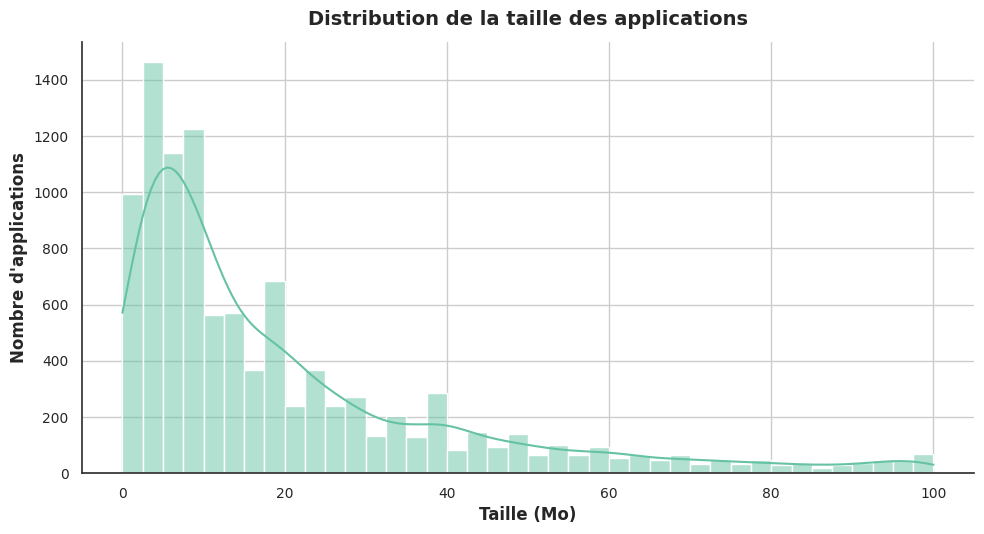

In [34]:
#Distribution de la variable "Size"
plt.figure()
sns.histplot( data=Data, x='Size', bins=40, color=palette_main[0], kde=True)

plt.title("Distribution de la taille des applications", y=1.02)
plt.xlabel("Taille (Mo)")
plt.ylabel("Nombre d'applications")

plt.tight_layout()
plt.show()

In [35]:
#Analyse de la variable 'Size'
print(f"Coefficient d'asymétrie (skew) de Size : {Data['Size'].skew():.4f}")

Coefficient d'asymétrie (skew) de Size : 1.7349


Le coefficient d’asymétrie positif (1.7349) signifie que la variable **Size** est concentrée vers les petites valeurs (0–20 Mo), avec une queue qui s’étire vers les grandes valeurs. La distribution est donc asymétrique à droite.

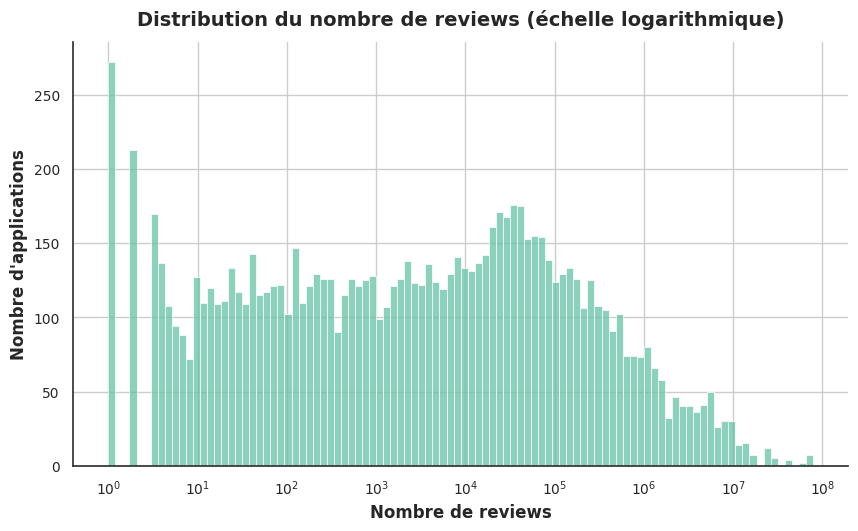

In [36]:
#Distribution de la variable "Reviews"
plt.figure()
sns.histplot(data=Data, x='Reviews', bins=100, color=palette_main[0], log_scale=True)
plt.title("Distribution du nombre de reviews (échelle logarithmique)", y=1.02)
plt.xlabel("Nombre de reviews")
plt.ylabel("Nombre d'applications")
plt.show()

In [37]:
#Analyse de la variable 'Reviews'
print(f"Coefficient d'asymétrie (skew) de Reviews : {Data['Reviews'].skew():.4f}")

Coefficient d'asymétrie (skew) de Reviews : 17.4682


Le coefficient d’asymétrie de **17.47** indique que la variable **Reviews** est extrêmement **asymétrique à droite**. La grande majorité des applications ont très peu d’avis, tandis que quelques-unes en ont un nombre très élevé, créant une longue queue vers les valeurs maximales.

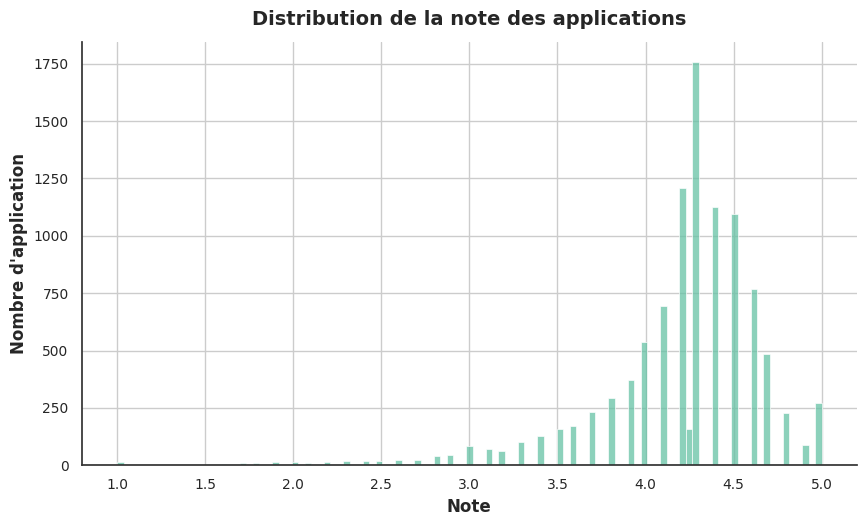

In [38]:
#Distribution de la variable "Rating"
plt.figure()
sns.histplot(data=Data, x='Rating', color=palette_main[0])
plt.title('Distribution de la note des applications', y= 1.02)
plt.xlabel("Note")
plt.ylabel("Nombre d'application")
plt.show()

In [39]:
#Analyse de la variable 'Rating'
skew_rating = Data['Rating'].skew()
kurt_rating = Data['Rating'].kurt()

print(f"Skew de Rating : {skew_rating:.4f}")
print(f"Kurtosis de Rating : {kurt_rating:.4f}")

Skew de Rating : -2.0265
Kurtosis de Rating : 7.0608


La variable **Rating** est centrée autour de 4.2 et semble en cloche, mais le skew négatif (-2.03) et la kurtosis élevée (7.06) montrent qu'elle est **asymétrique à gauche** et plus pointue qu’une normale.

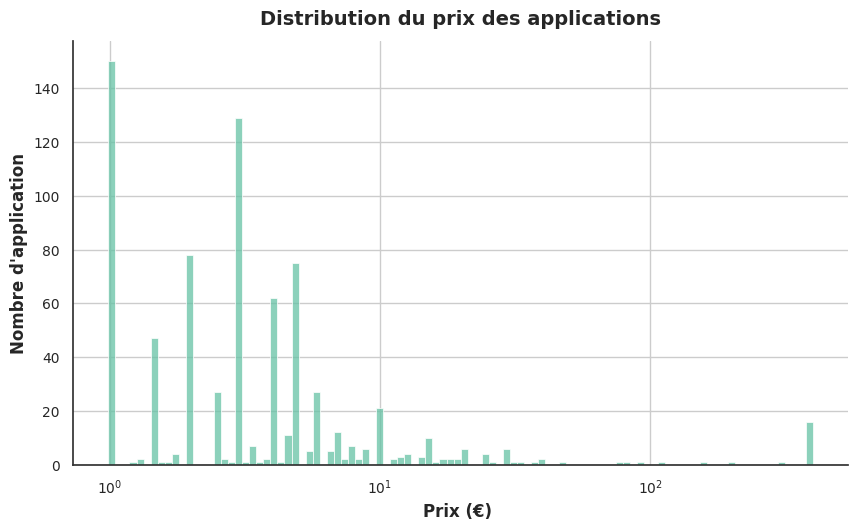

In [40]:
#Distribution de la variable "Price"
plt.figure()
sns.histplot(data=Data, x='Price', bins=100, color=palette_main[0], log_scale=True)
plt.title('Distribution du prix des applications', y=1.02)
plt.xlabel("Prix (€) ")
plt.ylabel("Nombre d'application")
plt.show()

In [41]:
#Analyse de la variable 'Price'
skew_price = Data['Price'].skew()
kurt_price = Data['Price'].kurt()

print(f"Skew de Rating : {skew_price:.4f}")
print(f"Kurtosis de Rating : {kurt_price:.4f}")

Skew de Rating : 23.3255
Kurtosis de Rating : 557.5470


La variable **Price** est **extrêmement asymétrique à droite** (skew = 23.33) avec une **kurtosis très élevée** (557.55), indiquant que la majorité des applications sont gratuites ou peu chères, tandis que quelques-unes ont des prix très élevés, créant une longue queue vers les grandes valeurs.

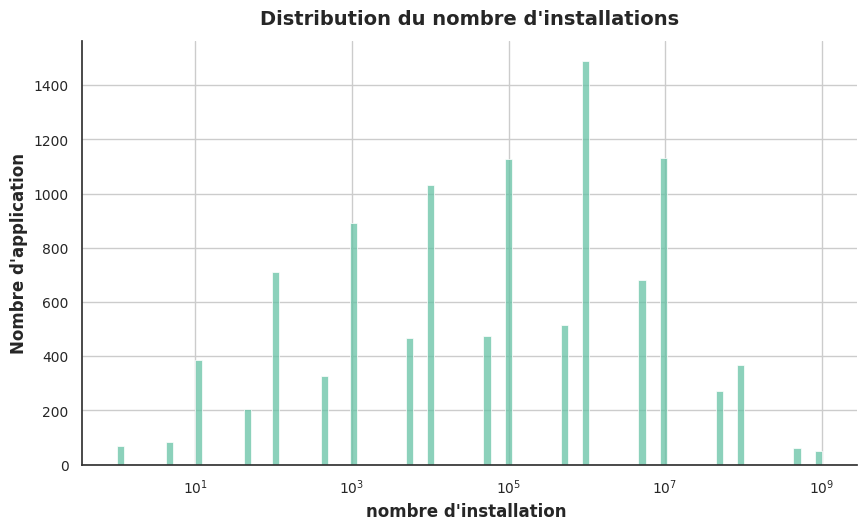

In [42]:
#Distribution de la variable "Installs"
plt.figure()
sns.histplot(data=Data, x='Installs', bins=100, color=palette_main[0], log_scale=True)
plt.title("Distribution du nombre d'installations", y=1.02)
plt.xlabel("nombre d'installation ")
plt.ylabel("Nombre d'application")
plt.show()

In [43]:
#Analyse de la variable 'Installs'
skew_installs = Data['Installs'].skew()
kurt_installs = Data['Installs'].kurt()

print(f"Skew de Installs : {skew_installs:.4f}")
print(f"Kurtosis de Installs : {kurt_rating:.4f}")

Skew de Installs : 10.1272
Kurtosis de Installs : 7.0608


La variable **Installs** est fortement **asymétrique à droite** (skew = 10.13) avec une **kurtosis élevée** (112.86), indiquant que la majorité des applications ont peu de téléchargements, tandis que quelques-unes sont très populaires, créant une longue queue vers les grandes valeurs.

**Gestion des outliers**

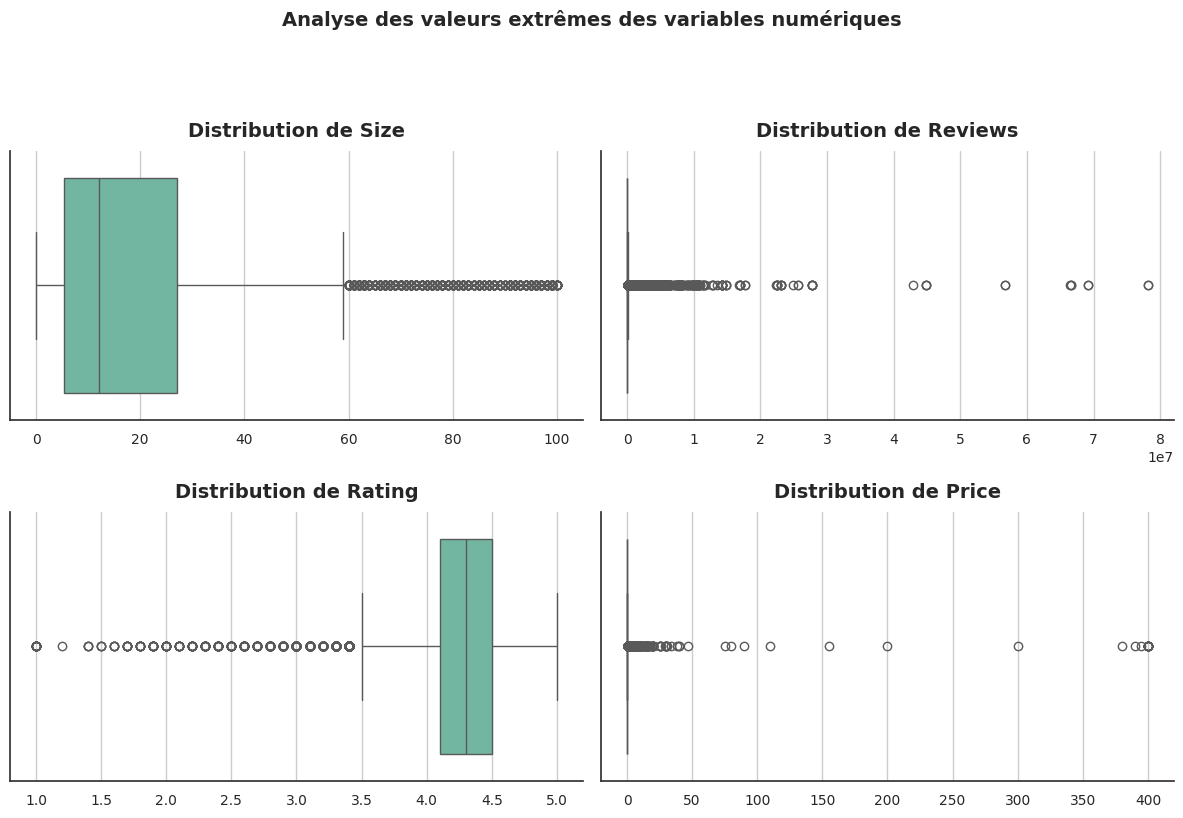

In [44]:
#Visualisation des outliers
num_cols = ['Size', 'Reviews', 'Rating', 'Price']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(data=Data, x=col, ax=ax, color = palette_main[0])
    ax.set_title(f"Distribution de {col}", pad=10)
    ax.set_xlabel("")   # optionnel : épure le rendu visuel

fig.suptitle("Analyse des valeurs extrêmes des variables numériques", 
             y=1.02, fontsize=14, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [45]:
# Traitement des valeurs extrêmes
col = ['Size', 'Reviews', 'Rating', 'Price']
Data_SO = Data.copy()

for value in col:
    Q3 = Data[value].quantile(0.75)
    Q1 = Data[value].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - IQR * 1.5
    upper = Q3 + IQR * 1.5
    outliers = Data_SO[(Data_SO[value] < lower ) | (Data_SO[value] > upper  )]
    Data_SO= Data_SO.drop(outliers.index)
pourcentage_conserve = len(Data_SO) / len(Data) * 100
print(f"Pourcentage des lignes conservées : { pourcentage_conserve} %")

Pourcentage des lignes conservées : 64.53948638733347 %


**J'ai identifié des valeurs extrêmes, environ 35,5%, selon le critère de Tukey (±1.5 × IQR).  
Ces valeurs ne sont pas aberrantes mais correspondent à des cas particuliers (applications très populaires, très volumineuses, etc.).
Ainsi, je crée un 2e dataframe, sans les outliers, nommé Data_SO.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyses Bivariées</h2>
</div>

In [46]:
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [47]:
installs_by_type = Data.groupby('Type', observed=True)['Installs'].count()
installs_by_type_formatted = installs_by_type.apply(lambda x: f"{int(x):,}".replace(",", " "))
print(installs_by_type_formatted)

Type
Free    9 593
Paid      765
Name: Installs, dtype: object


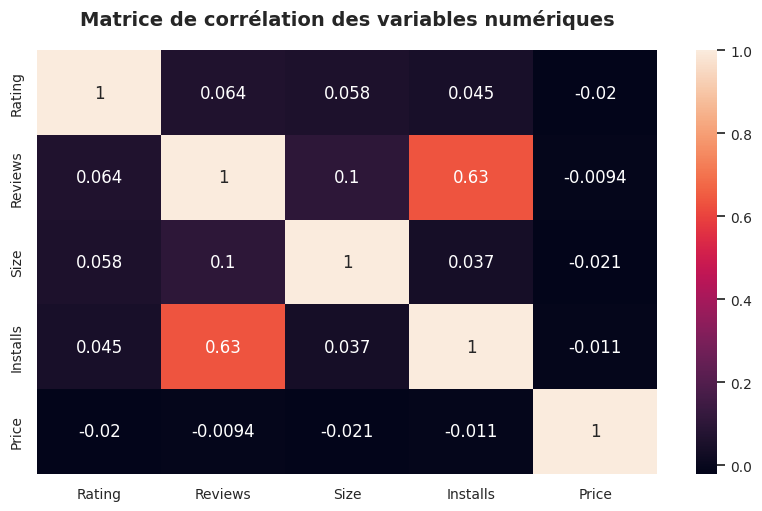

In [48]:
#Etude des corrélations entre les variables
plt.figure()
sns.heatmap(Data.select_dtypes(include=['number']).corr(), annot = True)
plt.title("Matrice de corrélation des variables numériques", y= 1.04)
plt.show()

D'après la matrice des corrélations, il existe un corrélation modérée à forte entre le nombre de reviews et les nombre d'installations.
Mais pour toutes les autres variables numériques, il n'y a quasiment aucunes relations entre elles.

In [49]:
Data['time_maj'] = dt.date.today() - Data['Last Updated'].dt.date
Data['time_maj'] = pd.to_timedelta(Data['time_maj'])
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,time_maj
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2903 days
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2895 days
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2697 days
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2751 days
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2739 days


In [50]:
Data.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                     int64
Size                      float64
Installs                    int64
Type                     category
Price                     float64
Content Rating           category
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
time_maj          timedelta64[ns]
dtype: object

**Analyses conseillées**

In [51]:
# Calcul du nombre moyen d'installations par catégorie de contenu
grouped_Content_Rating = Data.groupby('Content Rating', observed=True)[['Installs']].mean()
grouped_Content_Rating = grouped_Content_Rating.sort_values('Installs', ascending = False).reset_index()

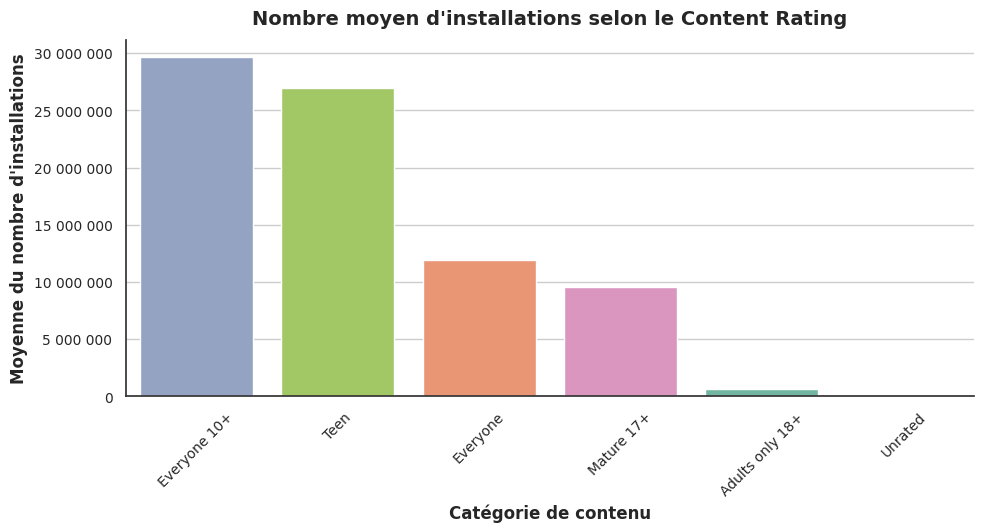

In [52]:
#Visualisation du nombre moyen d'installation selon la classification du contenu
plt.figure()
sns.barplot(data=grouped_Content_Rating, x='Content Rating', y='Installs', 
            order = grouped_Content_Rating['Content Rating'],
            hue='Content Rating', dodge=False,legend=False, palette=palette_main[:6])

plt.title("Nombre moyen d'installations selon le Content Rating", y = 1.02)
plt.xlabel("Catégorie de contenu")
plt.ylabel("Moyenne du nombre d'installations")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " ")))
plt.tight_layout()
plt.show()

**Observation :** Les catégories destinées aux jeunes sont celles qui génèrent le plus d'installations, avec Everyone 10+ (\~30 000 000) et Teen (\~26 000 000) en tête, tandis que les autres catégories ont des moyennes beaucoup plus faibles.

In [53]:
# Calcul du nombre moyen d'installations par catégorie 
grouped_categ = Data.groupby('Category', observed=True)[['Installs']].mean()
grouped_categ = grouped_categ.sort_values('Installs', ascending = False).reset_index()
#grouped_categ 

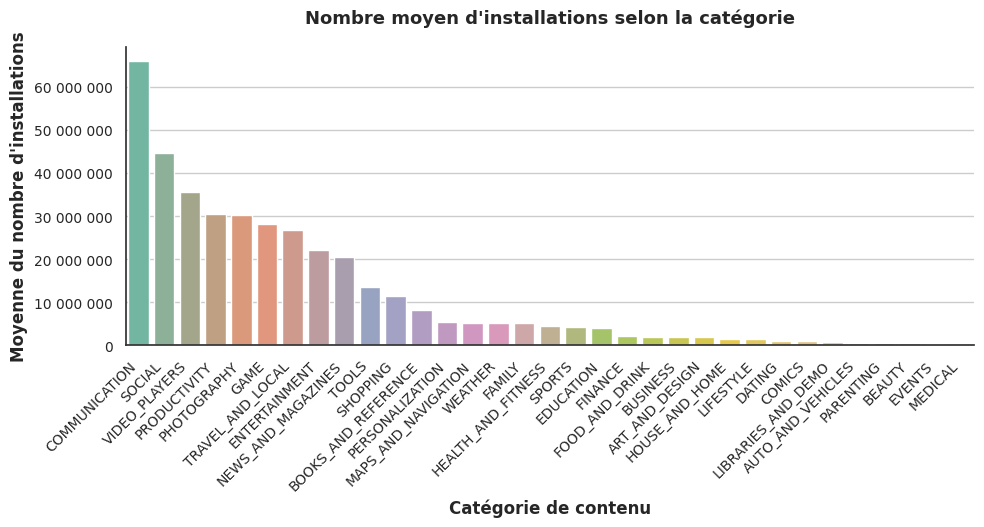

In [54]:
# Palette adaptée
n_categories = grouped_categ['Category'].nunique()
palette_dynamic = get_extended_palette(sns.color_palette("Set2"), n_categories)

#Visualisation du nombre moyen d'installation selon la categorie   
plt.figure()
sns.barplot(data=grouped_categ, x='Category', y='Installs', hue='Category', 
            dodge=False, legend=False, palette=palette_dynamic)

plt.title("Nombre moyen d'installations selon la catégorie", y=1.05, fontsize=13, weight='bold')
plt.xlabel("Catégorie de contenu")
plt.ylabel("Moyenne du nombre d'installations")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " "))
)
plt.tight_layout()
plt.show()

**Observation :** Les catégories *Communication*, *Social* et *Video_players* génèrent en moyenne plus de 30 000 000 d'installations, tandis que six autres catégories se situent entre 20 000 000 et 30 000 000. Les autres catégories ont des moyennes nettement plus faibles, ce qui montre une concentration importante des installations dans un petit nombre de catégories.

In [55]:
# Calcul du nombre moyen d'installations par type
grouped_type = Data.groupby('Type', observed=True)[['Installs']].mean()
grouped_type.sort_values('Installs')

,Installs
Type,
Paid,9.049135e+04
Free,1.527809e+07


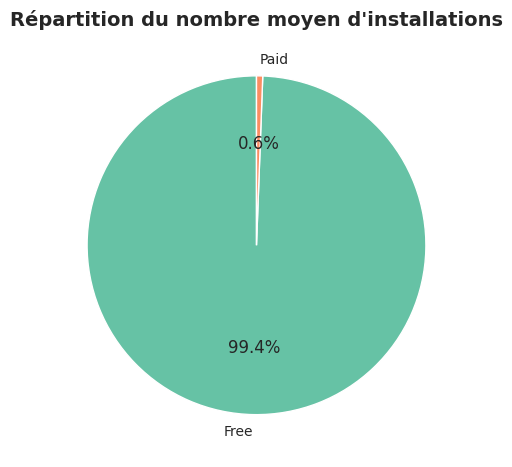

In [56]:
#Visualisation du pourcentage d'installation selon le type
plt.figure()
plt.pie(
    grouped_type['Installs'],
    labels=grouped_type.index,
    autopct='%1.1f%%',
    colors=palette_main,
    startangle=90
)
plt.title("Répartition du nombre moyen d'installations")
plt.show()

**Observation :** La très grande majorité des installations d'applications sont des gratuites, les payantes ne représentent qu'un faible volume de 0,6 %.

Partie 2 

In [57]:
#sns.scatterplot(data= Data, x='Price', y='Installs') + plt.yscale('log')
#plt.show()

In [58]:
#Notes moyennes selon les catégories
grouped_rating_categ = Data.groupby('Category', observed=True)[['Rating']].mean()
grouped_rating_categ = grouped_rating_categ.sort_values('Rating', ascending=False).reset_index()
#grouped_rating_categ

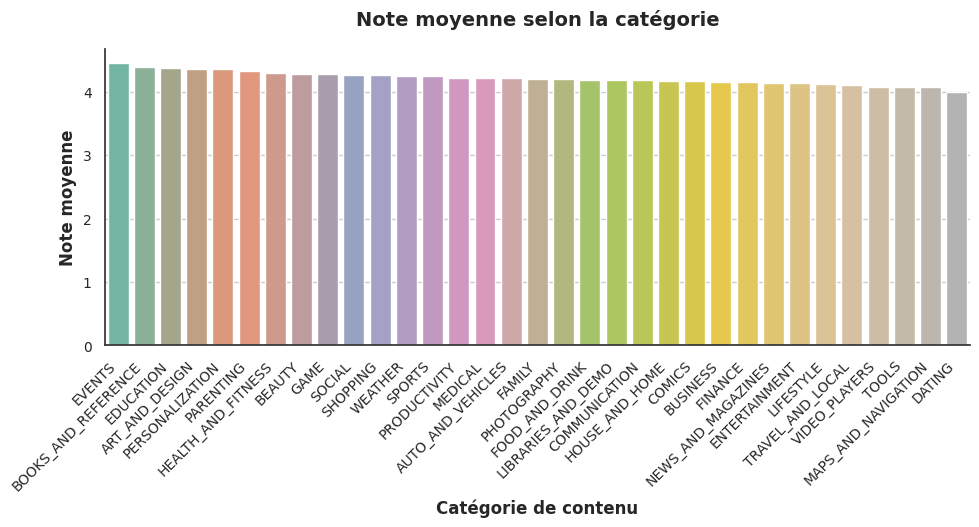

In [59]:
# Palette adaptée
n_categories = grouped_rating_categ['Category'].nunique()
palette_dynamic = get_extended_palette(sns.color_palette("Set2"), n_categories)

#Visualisation de la note moyenne selon la catégorie
plt.figure()
sns.barplot(data=grouped_rating_categ, x='Category', y='Rating', hue='Category', 
            dodge=False, legend=False, palette=palette_dynamic)

plt.title("Note moyenne selon la catégorie", y=1.05)
plt.xlabel("Catégorie de contenu")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " "))
)
plt.tight_layout()
plt.show()

**Observation :** On note une homogénéité des notations, quel que soit la catégorie.

In [60]:
#Calcul des notes moyennes selon le type
grouped_rating_type = Data.groupby('Type', observed= True)[['Rating']].mean()
grouped_rating_type = grouped_rating_type.sort_values('Rating').reset_index()

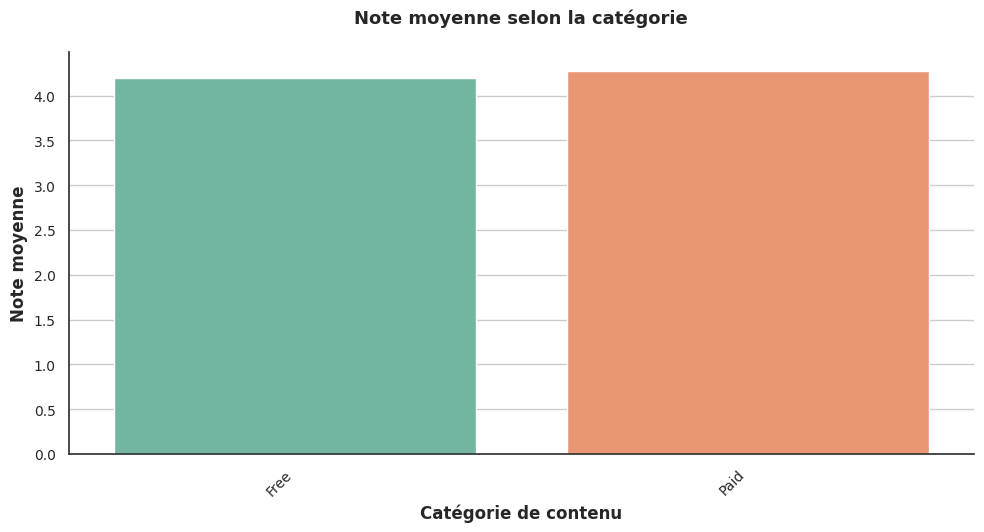

In [61]:
#Visualisation de la note moyenne selon le type 
plt.figure()
sns.barplot(data=grouped_rating_type, x='Type', y='Rating', hue='Type', dodge=False, legend=False, palette='Set2')

plt.title("Note moyenne selon la catégorie", y=1.05, fontsize=13, weight='bold')
plt.xlabel("Catégorie de contenu")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Test d'hypothèse :**

In [62]:
Data['Type'].value_counts(normalize = True)

Type
Free    0.926144
Paid    0.073856
Name: proportion, dtype: float64

In [63]:
# Extraction des groupes
paid = Data.loc[Data['Type'] == 'Paid', 'Rating'].dropna()
free = Data.loc[Data['Type'] == 'Free', 'Rating'].dropna()

# Vérification des tailles
print(f"Tailles : Paid={len(paid)}, Free={len(free)}")

Tailles : Paid=765, Free=9593


In [64]:
# Test de normalité (D’Agostino-Pearson)
norm_paid = stats.normaltest(paid).pvalue
norm_free = stats.normaltest(free).pvalue

# Test d’homogénéité des variances (Levene)
levene_p = stats.levene(paid, free).pvalue

# Affichage
print(f"Normalité : Paid={norm_paid:.4f}, Free={norm_free:.4f}")
print(f"Homogénéité variances (Levene) : p={levene_p:.4f}")

Normalité : Paid=0.0000, Free=0.0000
Homogénéité variances (Levene) : p=0.6237


In [65]:
# Décision automatique du test
normal = (norm_paid > 0.05) and (norm_free > 0.05)
equal_var = levene_p > 0.05

test_used = (
    "t-test de Student" if normal and equal_var else
    "t-test de Welch" if normal else
    "Mann-Whitney U"
)
print(f"Test recommandé : {test_used}")

# Exécution des tests
ttest_p = stats.ttest_ind(paid, free, equal_var=equal_var).pvalue
mw_p = stats.mannwhitneyu(paid, free, alternative='two-sided').pvalue

print(f"p-value t-test : {ttest_p:.4e}")
print(f"p-value Mann-Whitney : {mw_p:.4e}")

Test recommandé : Mann-Whitney U
p-value t-test : 2.1535e-05
p-value Mann-Whitney : 1.9488e-11


In [66]:
# Test Mann-Whitney U
u_stat, p_val = mannwhitneyu(paid, free, alternative='two-sided')

# Calcul Z approximatif
n1, n2 = len(paid), len(free)
u_mean = n1 * n2 / 2
u_std = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
z = (u_stat - u_mean) / u_std

# Taille d'effet r
r = abs(z) / np.sqrt(n1 + n2)

print(f"Mann-Whitney U : U={u_stat}, p-value={p_val:.3e}")
print(f"Taille d'effet r = {r:.3f} (0.1 petit, 0.3 moyen, 0.5 grand)")

Mann-Whitney U : U=4200699.5, p-value=1.949e-11
Taille d'effet r = 0.066 (0.1 petit, 0.3 moyen, 0.5 grand)


**Comparaison des notes : Paid vs Free**

Échantillons : Paid = 765 | Free = 9593
Normalité : non (p < 0.001) | Variances : homogènes (p = 0.624)
Test : Mann-Whitney U
Résultat : p = 1.95×10⁻¹¹ → différence significative

**Conclusion** : 
Les ratings des applications Paid et Free diffèrent de manière statistiquement significative (p < 0.001). Cependant, la taille d’effet r = 0.066 montre que cette différence est très faible en pratique. Les utilisateurs attribuent donc des notes très similaires aux applications Paid et Free, même si la différence est détectable statistiquement.

In [67]:
#Calcul des notes moyennes selon les catégories de contenu
grouped_rating_content = Data.groupby('Content Rating', observed= True)[['Rating']].mean()
grouped_rating_content = grouped_rating_content .sort_values('Rating', ascending = False).reset_index()

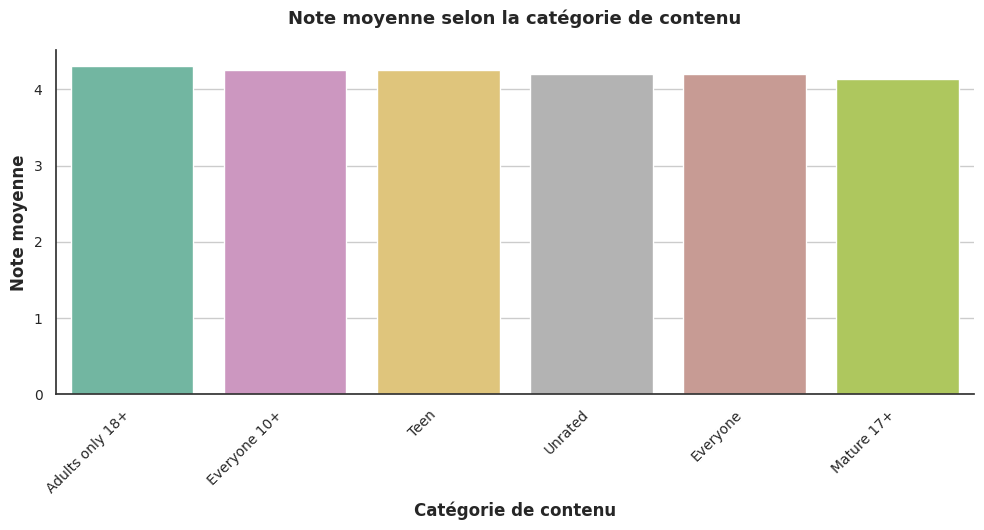

In [68]:
# Palette adaptée
n_categories = grouped_rating_content['Content Rating'].nunique()
palette_dynamic = get_extended_palette(sns.color_palette("Set2"), n_categories)

#Visualisation de la note moyenne selon les catégories de contenu
plt.figure()
sns.barplot(data=grouped_rating_content, x='Content Rating', y='Rating', 
            hue='Content Rating', order = grouped_rating_content['Content Rating'],
            dodge=False, legend=False, palette= palette_dynamic)

plt.title("Note moyenne selon la catégorie de contenu", y=1.05, fontsize=13, weight='bold')
plt.xlabel("Catégorie de contenu")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " "))
)
plt.tight_layout()
plt.show()

Comme la taille des groupes est inégale et que la distribution de la variable 'Rating' n'est pas normale, je vais utiliser un test de Kruskal-Wallis plutôt que l'ANOVA.

In [69]:
#Préparation des groupes
groups = [g['Rating'].dropna()for _, g in Data.groupby('Content Rating', observed=True)]

# Test de Kruskal-Wallis
H, p = kruskal(*groups)

print(f"Kruskal-Wallis : H={H:.2f}, p={p:.3e}")

Kruskal-Wallis : H=28.90, p=2.421e-05


In [70]:
# Nombre de groupes et total des observations
k = len(groups)
n = sum(len(g) for g in groups)

# Taille d'effet
eta2 = (H - k + 1) / (n - k)

print(f"Kruskal-Wallis : H={H:.2f}, p={p:.3e}")
print(f"Taille d'effet η² = {eta2:.3f} (0.01 petit, 0.06 moyen, 0.14 grand)")

Kruskal-Wallis : H=28.90, p=2.421e-05
Taille d'effet η² = 0.002 (0.01 petit, 0.06 moyen, 0.14 grand)


Bien que le test de Kruskal-Wallis montre une différence statistiquement significative des notes selon le Content Rating (p < 0.001), la taille d’effet η² = 0.002 indique que cette différence est pratiquement négligeable. En d’autres termes, le Content Rating n’a quasi aucune influence réelle sur la note moyenne des applications.

INSTALL VS RATING

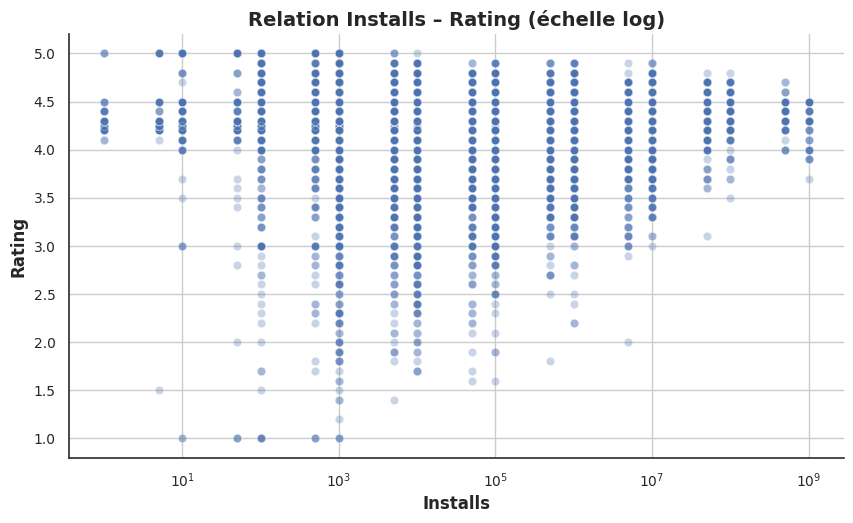

In [71]:
plt.figure()
sns.scatterplot(data=Data, x='Installs', y='Rating', alpha=0.3)
plt.xscale('log')
plt.title("Relation Installs – Rating (échelle log)")
plt.show()

Bien que le scatterplot en échelle logarithmique permette de visualiser les deux variables dans un même graphique, il reste difficile à interpréter : la variable Installs présente une très forte asymétrie, et les points sont très concentrés dans certaines zones. Cela empêche de distinguer clairement une éventuelle tendance entre le nombre d’installations et le rating.

Pour améliorer la lisibilité, nous regroupons les applications en six tranches d’installations (via qcut) afin d’examiner la distribution du Rating pour différents niveaux de popularité.

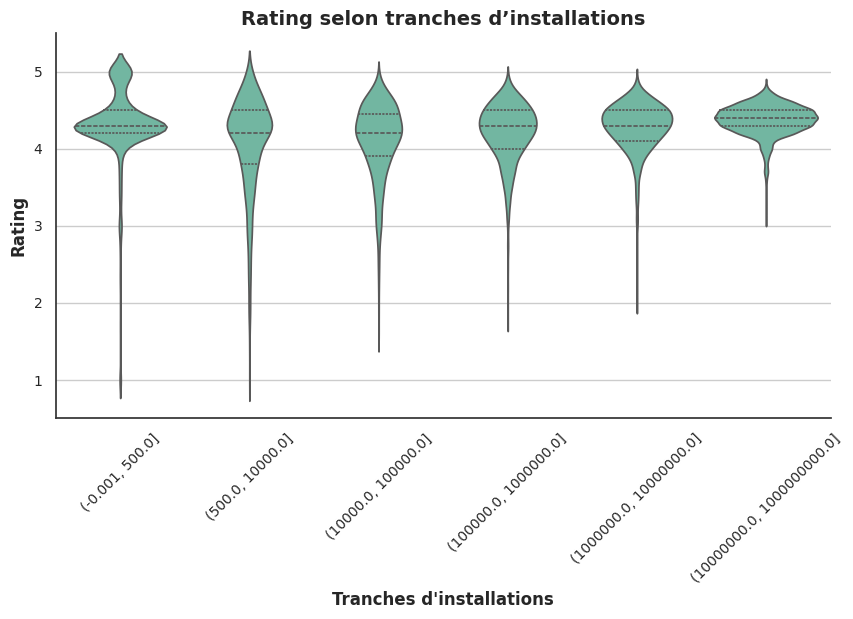

In [72]:
# Découpage des installations en 6 tranches et analyse de la distribution du rating par groupe
Data['Installs_bin'] = pd.qcut(Data['Installs'], q=6)

plt.figure(figsize=(10,5))
sns.violinplot(data=Data, x='Installs_bin', y='Rating', inner='quartile', color=palette_main[0])
plt.xticks(rotation=45)
plt.title("Rating selon tranches d’installations")
plt.xlabel("Tranches d'installations")
plt.ylabel("Rating")
plt.show()

Les ratings moyens ne varient pas significativement selon les tranches d’installations. Cependant, les groupes les moins populaires présentent une plus forte dispersion vers le bas, indiquant davantage d'applications faiblement notées.

In [73]:
#Test d'hypothèse
spearman_corr, spearman_p = spearmanr(Data['Installs'], Data['Rating'])
print(f"Corrélation de Spearman : {spearman_corr:.3f} (p-value={spearman_p:.3e})")

Corrélation de Spearman : 0.045 (p-value=4.996e-06)


Bien que la p-value soit très faible et permette de rejeter l’hypothèse nulle, la corrélation de Spearman (ρ = 0.045) indique une taille d’effet quasi nulle.
On observe donc une corrélation statistiquement significative mais non pertinente en pratique

partie nouvelle colonne

**PARTIE 3** : Analyse des revenus

Je suppose ici que toutes les installations payantes génèrent un paiement.

In [74]:
#Création de la colonne des revenus, et print du total
Data['Revenu'] = Data['Price'] * Data['Installs']
Total = round(Data['Revenu'].sum(), 2)
print(f"Somme des revenus générés : {Total:,.2f}".replace(",", " ") + " €")

Somme des revenus générés : 367 471 847.79 €


In [75]:
# Calcul des revenus par catégories
revenu_cat = Data.groupby('Category')['Revenu'].sum()
revenu_cat= revenu_cat.sort_values(ascending=False).head(20).reset_index()

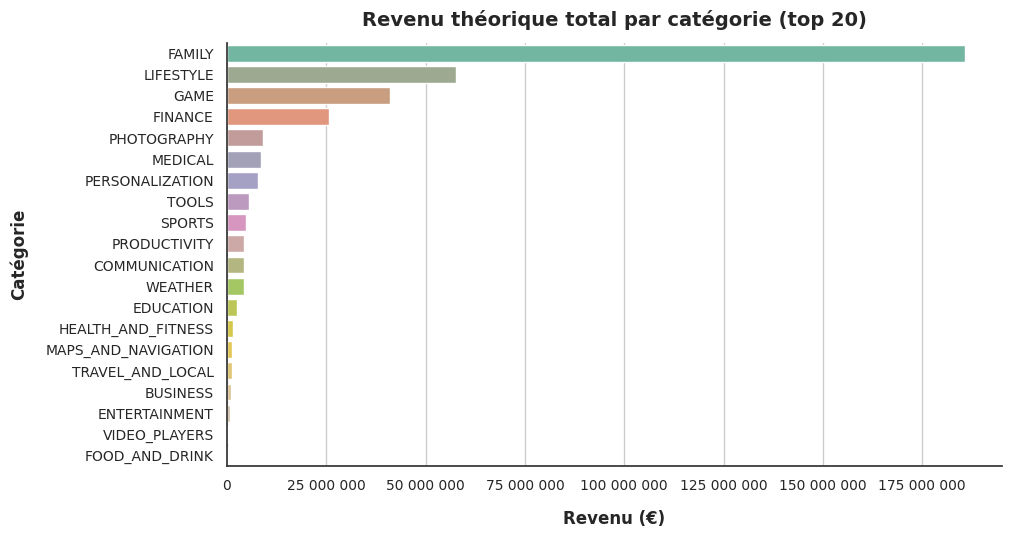

In [76]:
# Palette adaptée
n_categories = revenu_cat['Category'].nunique()
palette_dynamic = get_extended_palette(sns.color_palette("Set2"), n_categories)

#Visualisation des revenus par catégories
plt.figure()
sns.barplot(x = revenu_cat['Revenu'], y= revenu_cat['Category'],  
            hue = revenu_cat['Category'], palette = palette_dynamic)
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " "))
)
plt.title("Revenu théorique total par catégorie (top 20)", y= 1.02)
plt.xlabel("Revenu (€)", labelpad=12)
plt.ylabel("Catégorie", labelpad=12)
plt.show()

La **génération de revenus** semble présenter une forte asymétrie selon les catégories d’applications : une minorité de catégories concentre la majorité du chiffre d’affaires total.
Afin de confirmer et de quantifier cette inégalité, nous traçons une courbe de Lorenz, outil standard pour mesurer la concentration d’une variable (ici, le revenu) à travers différentes classes.

In [77]:
# Préparation à la Courbe de Lorenz
Revenu_par_categ = Data.groupby('Category')[['Revenu']].sum()
sorted_values = np.sort(Revenu_par_categ['Revenu'].values)

# Cumul des valeurs
cumulative = np.cumsum(sorted_values)

# Normalisation
cumulative_percent = cumulative / cumulative[-1]  # cumulé / total
x = np.linspace(0.0, 1.0, len(cumulative_percent))

# Ajout de 0 au début pour la courbe
x = np.insert(x, 0, 0)
cumulative_percent = np.insert(cumulative_percent, 0, 0)

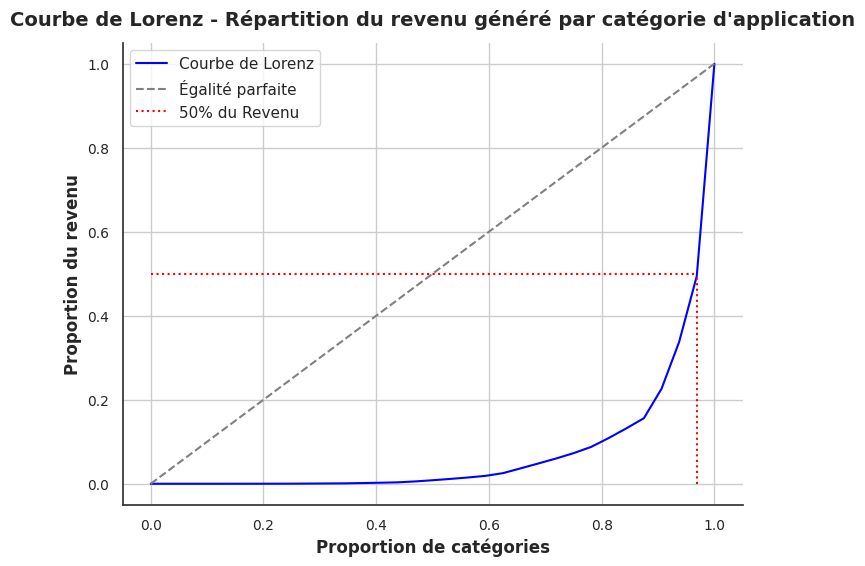

In [78]:
#Courbe de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(x, cumulative_percent, label='Courbe de Lorenz', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Égalité parfaite')

x_median = np.interp(0.5, cumulative_percent, x) 
plt.plot([0, x_median], [0.5, 0.5], color='red', linestyle=':', label='50% du Revenu')
plt.plot([x_median, x_median], [0, 0.5], color='red', linestyle=':')

plt.title("Courbe de Lorenz - Répartition du revenu généré par catégorie d'application", y = 1.02)
plt.xlabel("Proportion de catégories")
plt.ylabel("Proportion du revenu")
plt.legend()
plt.grid(True)
plt.show()

Interprétation de la **courbe de Lorenz** :

La courbe de Lorenz obtenue met en évidence une forte concentration du revenu parmi les catégories d’applications.
La lecture du graphique montre que :

50 % du revenu total est généré par environ 4 % des catégories (≈ 0.96 sur l’axe des proportions de catégories).

La courbe s'écarte nettement de la diagonale d’égalité parfaite, ce qui traduit une inégalité marquée dans la distribution du revenu.

Seule une minorité de catégories contribue de manière significative au chiffre d’affaires global, tandis que la grande majorité génère des revenus faibles ou marginaux.

Cette analyse confirme donc notre hypothèse initiale : le marché des applications étudiées présente une forte asymétrie, où quelques catégories dominent largement la création de valeur.
Une mesure complémentaire, telle que le coefficient de Gini, pourrait également être calculée afin de quantifier précisément ce niveau d’inégalité.

In [79]:
# Indice de GINI
gini = 1 - 2 * np.trapezoid(cumulative_percent, x)
print(f"Indice de Gini : {gini:.4f}")

Indice de Gini : 0.8528


L’indice de **Gini** associé à la distribution des revenus est de 0,853, confirmant un niveau d’inégalité extrêmement élevé parmi les catégories d’applications.

**PARTIE 4** : Analyses temporelles

In [80]:
# Calcul de la note moyenne par version Android
grouped_rating_android= Data.groupby('Android Ver')[['Rating']].mean()
grouped_rating_android = grouped_rating_android.sort_values('Rating').reset_index()

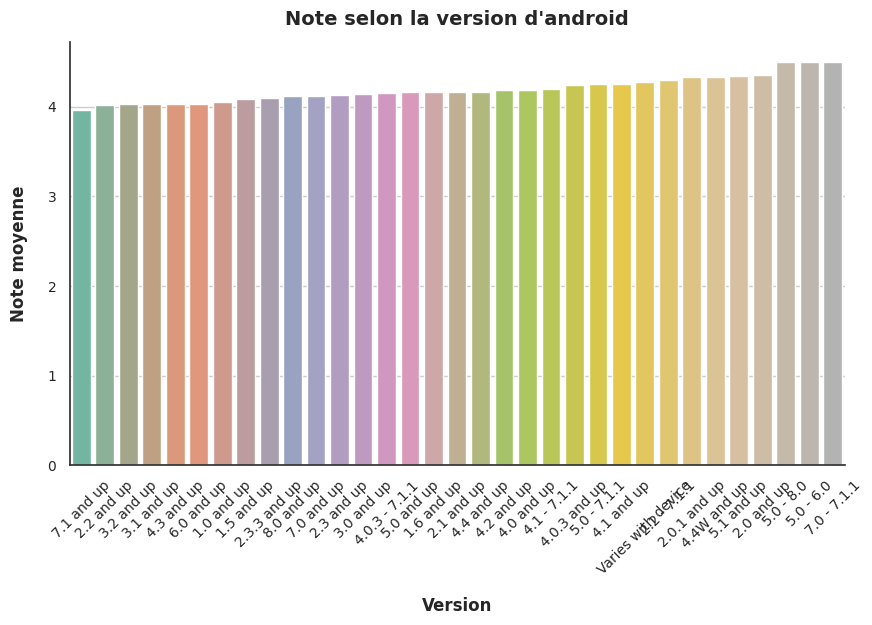

In [81]:
# Palette adaptée
n_categories = grouped_rating_android['Android Ver'].nunique()
palette_dynamic = get_extended_palette(sns.color_palette("Set2"), n_categories)

#Visualisation de la note moyenne par version Android
plt.figure()
sns.barplot(data = grouped_rating_android, x = 'Android Ver', y= 'Rating', hue = 'Android Ver', 
            palette = palette_dynamic)
plt.title("Note selon la version d'android", y= 1.02)
plt.xlabel("Version", labelpad=14)
plt.ylabel("Note moyenne", labelpad=14)
plt.xticks(rotation=45)
plt.show()

In [82]:
Data[['Genre_Principal', 'Genre_Secondaire']] = Data['Genres'].str.split(pat=';', n=1, expand=True)
Data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,time_maj,Installs_bin,Revenu,Genre_Principal,Genre_Secondaire
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.00,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2903 days,"(500.0, 10000.0]",0.0,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.00,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2895 days,"(100000.0, 1000000.0]",0.0,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.70,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2697 days,"(1000000.0, 10000000.0]",0.0,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.00,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2751 days,"(10000000.0, 1000000000.0]",0.0,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.80,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2739 days,"(10000.0, 100000.0]",0.0,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.00,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,3069 days,"(500.0, 10000.0]",0.0,Education,None
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.60,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2723 days,"(-0.001, 500.0]",0.0,Education,None
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.50,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,3255 days,"(500.0, 10000.0]",0.0,Medical,None
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7.35,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,3987 days,"(500.0, 10000.0]",0.0,Books & Reference,None


In [83]:
# Recent, plus d'installations?
temp_Installs = Data.resample('ME', on ='Last Updated')['Installs'].mean()
temp_Installs = temp_Installs.reset_index()

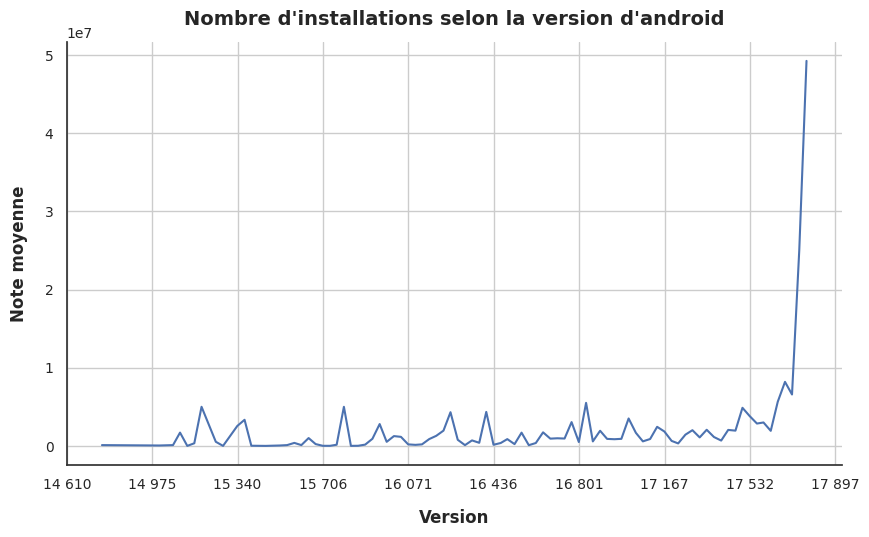

In [84]:
plt.figure()
sns.lineplot(data= temp_Installs, x= 'Last Updated', y= 'Installs')
plt.title("Nombre d'installations selon la version d'android", y= 1.02)
plt.xlabel("Version", labelpad=12)
plt.ylabel("Note moyenne", labelpad=12)
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", " "))
)
plt.show()

In [85]:
# Versions Récentes, meilleures notes?
temp_rating = Data.resample('ME', on ='Last Updated')['Rating'].mean()
temp_rating = temp_rating.reset_index()

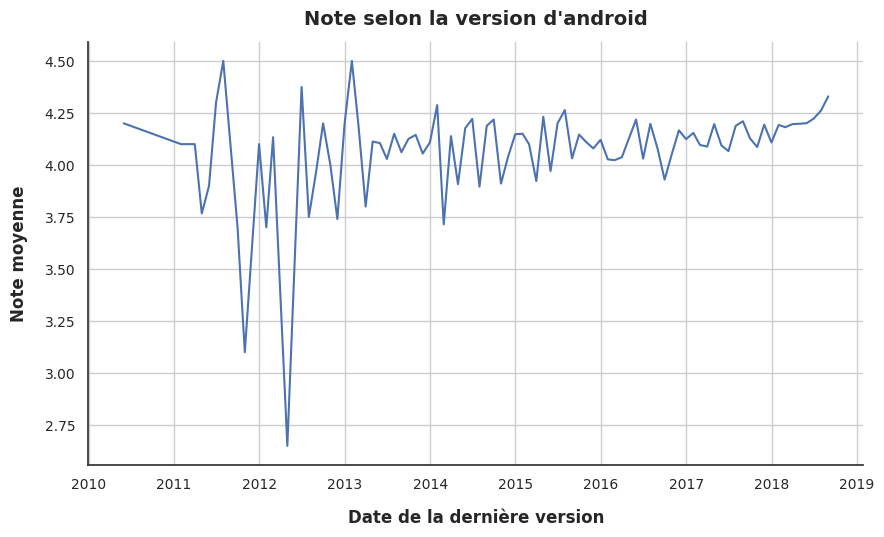

In [86]:
plt.figure()
sns.lineplot(data= temp_rating, x= 'Last Updated', y= 'Rating')
plt.title("Note selon la version d'android", y= 1.02)
plt.xlabel("Date de la dernière version", labelpad=12)
plt.ylabel("Note moyenne", labelpad=12)
plt.show()

In [87]:
temp_revenu = Data.resample('ME', on ='Last Updated')['Revenu'].sum()
temp_revenu = temp_revenu.reset_index()

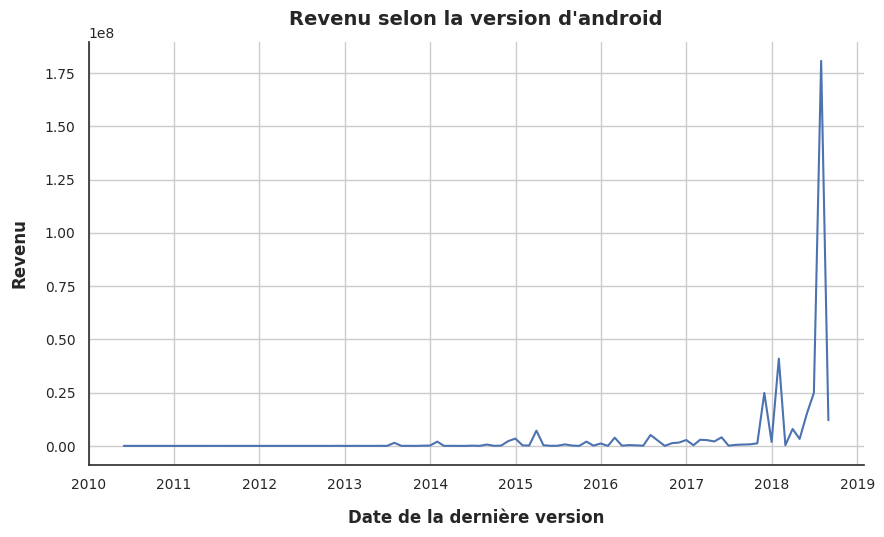

In [88]:
plt.figure()
sns.lineplot(data= temp_revenu, x= 'Last Updated', y= 'Revenu')
plt.title("Revenu selon la version d'android", y= 1.02)
plt.xlabel("Date de la dernière version", labelpad=12)
plt.ylabel("Revenu", labelpad=12)
plt.show()

**CONCLUSION FINALE:**
99.4 % des applications du Google Play Store sont gratuites. Les 0.6 % restantes ont généré à l'entreprise un revenu total de 367 471 847.79 €, sur les durées étudiées. Parmi les applications payantes, seules 4 % générent 50 % du revenu total.
Les catégories d'applications n'ont pas d'incidence notable sur les notations.